In [24]:
import pandas as pd
import datetime
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/California_Fire_Incidents.csv")

In [6]:
df.head(10)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
5,22992.0,False,Sierra National Forest,NaN,2013,False,/incidents/2013/7/22/aspen-fire/,NaN,NaN,Fresno,...,"217 Aspen Fire, July 2013, Big Creek, Fresno ...",2013-07-22T22:15:00Z,Finalized,NaN,NaN,NaN,NaN,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,2013-09-24T20:15:00Z,NaN
6,20292.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/8/7/silver-fire/,Firefighters closed the containment lines toda...,Hwy 243 remains closed between Twin Pines Road...,Riverside,...,"Silver Fire, August 2013, Popet Flats Road, Hi...",2013-08-07T14:05:00Z,Finalized,8.0,40.0,NaN,NaN,c400203b-a7fd-4bd8-803a-f3c74bc32a2b,2013-08-12T18:00:00Z,20.0
7,14754.0,False,Klamath National Forest,NaN,2013,False,/incidents/2013/7/31/salmon-river-complex/,NaN,NaN,Siskiyou,...,"210 Salmon River Complex, August 2013, July 20...",2013-07-31T22:00:00Z,Finalized,NaN,NaN,NaN,NaN,ba76c009-09c9-497c-b923-1ac8cf05c20d,2013-08-31T06:45:00Z,NaN
8,12503.0,False,Six Rivers National Forest,NaN,2013,False,/incidents/2013/8/10/corral-complex/,NaN,NaN,Humboldt,...,"Corral Complex, August 2013, Tish Tang Ridge, ...",2013-08-10T11:40:00Z,Finalized,NaN,NaN,NaN,NaN,f3dcbca8-f8ed-46d0-8f6e-9c7fc2fb03e6,2013-08-12T12:00:00Z,NaN
9,11429.0,False,CAL FIRE Tehama-Glenn Unit,NaN,2013,True,/incidents/2013/8/23/deer-fire/,Fire suppression repair will continue througho...,NaN,Tehama,...,"Deer Fire, August 2013, Tehama County, Deer Cr...",2013-08-23T14:15:00Z,Finalized,NaN,NaN,NaN,NaN,956dbcf6-db40-4b61-b235-4ede14738f1e,2013-08-29T16:45:00Z,8.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
AcresBurned             1633 non-null float64
Active                  1636 non-null bool
AdminUnit               1636 non-null object
AirTankers              28 non-null float64
ArchiveYear             1636 non-null int64
CalFireIncident         1636 non-null bool
CanonicalUrl            1636 non-null object
ConditionStatement      284 non-null object
ControlStatement        111 non-null object
Counties                1636 non-null object
CountyIds               1636 non-null object
CrewsInvolved           171 non-null float64
Dozers                  123 non-null float64
Engines                 191 non-null float64
Extinguished            1577 non-null object
Fatalities              21 non-null float64
Featured                1636 non-null bool
Final                   1636 non-null bool
FuelType                12 non-null object
Helicopters             84 non-null float64
Injuries

In [26]:
df.describe()

,AcresBurned,AirTankers,ArchiveYear,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,PercentContained,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
count,1633.000000,28.000000,1636.000000,171.000000,123.000000,191.000000,21.000000,84.000000,120.000000,1636.000000,1636.000000,1633.0,204.000000,67.000000,175.000000,0.0,30.000000,146.000000
mean,4589.443968,4.071429,2016.608802,11.561404,7.585366,23.565445,8.619048,5.357143,3.500000,37.203975,-108.082642,100.0,328.553922,67.970149,271.788571,NaN,522.800000,7.815068
std,27266.337722,6.399818,1.845340,14.455633,14.028616,41.004424,18.529642,7.265437,3.806231,135.401380,37.006927,0.0,521.138789,155.771975,1557.255963,NaN,739.586856,12.719251
min,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-120.258000,-124.196290,100.0,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,35.000000,2.000000,2015.000000,2.500000,1.000000,5.000000,1.000000,1.000000,1.000000,34.165890,-121.768358,100.0,55.000000,1.000000,1.000000,NaN,0.000000,2.000000
50%,100.000000,2.000000,2017.000000,6.000000,2.000000,11.000000,3.000000,2.000000,3.000000,37.104065,-120.461560,100.0,151.500000,6.000000,7.000000,NaN,45.000000,4.000000
75%,422.000000,4.000000,2018.000000,13.500000,5.000000,24.000000,6.000000,5.000000,4.000000,39.086808,-117.474072,100.0,350.000000,49.500000,41.500000,NaN,1043.750000,6.000000
max,410203.000000,27.000000,2019.000000,82.000000,76.000000,256.000000,85.000000,29.000000,26.000000,5487.000000,118.908200,100.0,3100.000000,783.000000,18804.000000,NaN,2600.000000,79.000000


In [8]:
df['Counties'].unique()

array(['Tuolumne', 'Los Angeles', 'Riverside', 'Placer', 'Ventura',
       'Fresno', 'Siskiyou', 'Humboldt', 'Tehama', 'Shasta', 'San Diego',
       'Kern', 'Sonoma', 'Contra Costa', 'Butte', 'Tulare',
       'Santa Barbara', 'Mariposa', 'Monterey', 'El Dorado',
       'San Bernardino', 'Plumas', 'Modoc', 'San Luis Obispo', 'Madera',
       'Inyo', 'Napa', 'San Benito', 'San Joaquin', 'Lake', 'Alameda',
       'Glenn', 'Yolo', 'Sacramento', 'Stanislaus', 'Solano', 'Merced',
       'Mendocino', 'Lassen', 'Amador', 'Yuba', 'Nevada', 'Santa Clara',
       'Calaveras', 'San Mateo', 'Orange', 'Colusa', 'Trinity',
       'Del Norte', 'Mono', 'Alpine', 'Sutter', 'Kings', 'Sierra',
       'Santa Cruz', 'Marin', 'Mexico', 'State of Oregon',
       'State of Nevada'], dtype=object)

The dataset is around 444 KB / 1600 entries, a very manageable size.

The relevant variables for our analysis are:
<ul><li>Counties (string): counties in which the fire was active</li>
<li>Started (string): date the fire started</li>
<li>Extinguished (string): date the fire was extinguished</li>
<li>Latitude and Longitude (float)</li>
</ul>

We will have to convert the Started and Extinguished dates to datetime format.

In [9]:
df.isnull().sum()

AcresBurned                3
Active                     0
AdminUnit                  0
AirTankers              1608
ArchiveYear                0
CalFireIncident            0
CanonicalUrl               0
ConditionStatement      1352
ControlStatement        1525
Counties                   0
CountyIds                  0
CrewsInvolved           1465
Dozers                  1513
Engines                 1445
Extinguished              59
Fatalities              1615
Featured                   0
Final                      0
FuelType                1624
Helicopters             1552
Injuries                1516
Latitude                   0
Location                   0
Longitude                  0
MajorIncident              0
Name                       0
PercentContained           3
PersonnelInvolved       1432
Public                     0
SearchDescription         17
SearchKeywords           203
Started                    0
Status                     0
StructuresDamaged       1569
StructuresDest

Four of the fields that we are interested in (Counties, Started, Latitude, and Longitude) are complete, with no null values. The last relevant field, Extinguished, has 59 nulls. To handle these, we will first see how many of them are associated with fire incidents for which Active == True; in these cases, it will make sense to leave the nulls, because the fires had not yet been extinguished at the time of data collection. 

In [11]:
print(df[['Active','Extinguished']].head(10))

   Active          Extinguished
0   False  2013-09-06T18:30:00Z
1   False  2013-06-08T18:30:00Z
2   False  2013-07-30T18:00:00Z
3   False  2013-08-30T08:00:00Z
4   False  2013-05-11T06:30:00Z
5   False  2013-09-24T20:15:00Z
6   False  2013-08-12T18:00:00Z
7   False  2013-08-31T06:45:00Z
8   False  2013-08-12T12:00:00Z
9   False  2013-08-29T16:45:00Z


However, looking at some of the data, it's clear that at least some of the NaNs are from fires where Active == False, meaning that they should have been extinguished at the time of data collection. For these, we will interpolate, so that we have an estimate of the date when the fire was extinguished and can mark it accordingly in our visualizations. We may also create another column indicating whether the Extinguished date was interpolated, so that these dates may be marked as estimates in the visualization.

In [12]:
# converting Started dates to datetime
df['Started_datetime'] = pd.to_datetime(df['Started'])
df['Started_datetime'].head()

0   2013-08-17 15:25:00
1   2013-05-30 15:28:00
2   2013-07-15 13:43:00
3   2013-08-10 16:30:00
4   2013-05-02 07:01:00
Name: Started_datetime, dtype: datetime64[ns]

In [14]:
# grouping and counting fire incidents by Started month
df['Started_month'] = df['Started_datetime'].dt.to_period(freq = 'M')

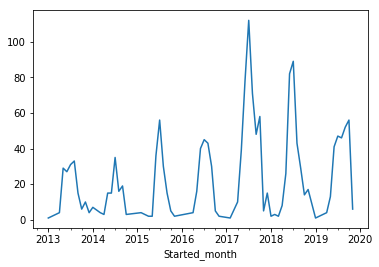

In [16]:
# plotting fire incidents by month, excluding the two entries from 1969
df.groupby('Started_month')['CalFireIncident'].count().iloc[1:].plot()

This line graph confirms our general understanding that California wildfires have worsened over time, starting in 2015 and especially in 2017. However, there is also data missing from 2019 (and no data for 2020), so we may need to find another source for more recent fires in order to perform accurate analyses on the data from the two most recent years.

It is somewhat surprising that 2017 has the largest number of fire incidents recorded, but another factor to consider will be the acreage affected by the fires rather than simply the number of incidents; it is possible that there have been fewer, larger fires in recent years. We can accomplish this by using the AcresBurned field. This field has only 3 null values, so we will look at these rows individually to determine how best to handle them.

In [20]:
# counting the number of fire incidents per county
# Bay Area counties are: Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo,
# Santa Clara, Solano, and Sonoma

county_fires_df = df.groupby('Counties')['CalFireIncident'].count()
print(county_fires_df)

Counties
Alameda             32
Alpine               2
Amador              13
Butte               66
Calaveras           22
Colusa               6
Contra Costa        27
Del Norte            6
El Dorado           37
Fresno              57
Glenn                8
Humboldt            25
Inyo                12
Kern                62
Kings                5
Lake                49
Lassen              36
Los Angeles         46
Madera              36
Marin                6
Mariposa            35
Mendocino           28
Merced              16
Mexico               2
Modoc               31
Mono                10
Monterey            45
Napa                25
Nevada              17
Orange              10
Placer              17
Plumas              11
Riverside          146
Sacramento          11
San Benito          20
San Bernardino      53
San Diego           89
San Joaquin          8
San Luis Obispo     64
San Mateo            3
Santa Barbara       29
Santa Clara         39
Santa Cruz           4
Sh

We see that the only Bay Area county with no recorded incidents is San Francisco county. This may be by happenstance, but we can check it by reviewing against other data sources. It does seem plausible, however, given that San Francisco county is almost entirely urban, making it an unlikely site for wildfires.

In [21]:
bay_area_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Mateo',
                     'Santa Clara', 'Solano', 'Sonoma']
for county in bay_area_counties:
    print(county,":",county_fires_df[county])

Alameda : 32
Contra Costa : 27
Marin : 6
Napa : 25
San Mateo : 3
Santa Clara : 39
Solano : 19
Sonoma : 18


In [22]:
# making a df for bay area data only
df_bay_area = df[df['Counties'].isin(bay_area_counties)]
df_bay_area.head(2)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,Started_datetime,Started_month
15,3505.0,False,CAL FIRE Sonoma-Lake-Napa Unit,NaN,2013,True,/incidents/2013/11/22/mccabe-fire/,Demobilization of equipment will continue. We...,NaN,Sonoma,...,Finalized,NaN,1.0,NaN,NaN,b4bc1480-cbb8-4ef2-8d5f-88a496d21d10,2013-11-27T18:15:00Z,NaN,2013-11-22 02:04:00,2013-11
17,3111.0,False,CAL FIRE Santa-Clara Unit,NaN,2013,True,/incidents/2013/9/8/morgan-fire/,Firefighters will continue mopping up inside t...,NaN,Contra Costa,...,Finalized,NaN,NaN,NaN,NaN,e33b2d80-7fec-4470-9e79-440d349b0d95,2013-09-14T17:30:00Z,4.0,2013-09-08 13:08:00,2013-09


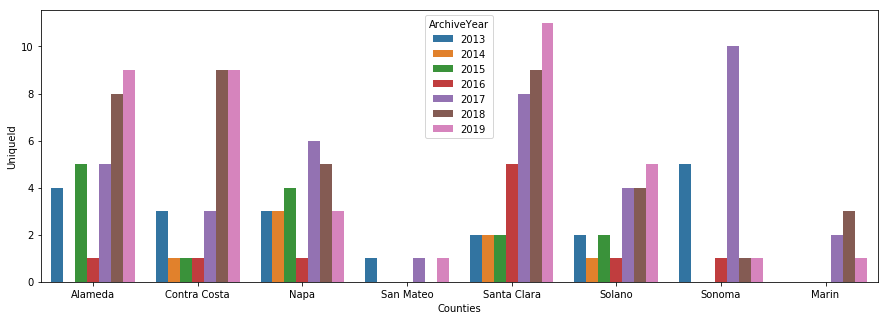

In [25]:
# plotting number of fires by county and by year
annual_fires = df_bay_area[['UniqueId', 'ArchiveYear', 'Counties']].groupby(by=['ArchiveYear', 'Counties']).count().reset_index()

fig, ax = plt.subplots(ncols=1, figsize=(15,5))
sns.barplot(x='Counties', y='UniqueId', hue='ArchiveYear', data=annual_fires)
#ax.set(title='Wildfires by Counties over Time', xlabel='Counties', ylabel='Wildfires')
plt.show()

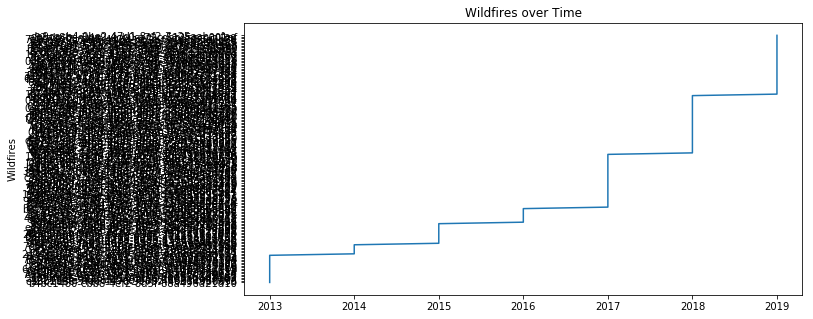

In [27]:
# view of this graph with emphasis on time
fig, ax = plt.subplots(ncols=1, figsize=(10,5))
plt.plot('ArchiveYear', 'UniqueId', data=df_bay_area)
plt.title('Wildfires over Time')
plt.ylabel('Wildfires')
plt.show()

Above we can see counties which consistently struggle with wildfires and some who also have more wildfires than others. Knowing this might help us decide if we want to represent the fire indicator differently to provide the proper context by the county over time. (will improve graph with more EDA) -- also of significance is the fact that wildfires have marginally increased year over year since 2013 for the total of all counties in the Bay Area, which further confirms what we saw in the line graph above.

<b>Closing thoughts on this dataset:</b>

Overall, the data that we need from this dataset is fairly clean and well-labeled. Because wildfires themselves have far more severe localized effects on mobility and travel than wildfire-related air pollution, the ability to locate wildfires precisely and indicate them in our final visualizations will be critical. Regarding linkages to other data sources, we have the variables ArchiveYear, Started, and Updated that are time indicators. We can use the last two and extract a date that can be used to connect to the travel and transportation (daily, annual, and quaterly) datasets for airports and AirBnB bookings, along with the air quality data that has incident dates recorded.

On the other hand, a primary limitation of the dataset is that it does not cover 2020, which is widely regarded as the worst year on record for California wildfires. To gain more insight into the 2020 fire season, we may have to scrape data directly from the original source of this dataset (CAL FIRE).

Our next steps will be to consider whether it is necessary to scrape data for 2020 and the remainder of 2019; to interpolate the null values in the Extinguished field; and to investigate the acreage burned in addition to the number of fire incidents, which may provide more insight into the severity of the wildfires.